### Basic Imports

In [0]:
import numpy as np, pandas as pd
import json, glob
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Load Files

In [0]:
json_files = glob.glob('/Users/rohitchugh/Projects/CS235/pdf_json/*.json', recursive=True)
len(json_files)

31774

### Define Paper Class

In [0]:
class Paper:
    def __init__(self, path):
        with open(path) as f:
            data = json.load(f)
            
            self.paper_id = data['paper_id']
            self.abstract = [entry['text'] for entry in data['abstract']]
            self.body = [entry['text'] for entry in data['body_text']]
            
            self.abstract = '\n'.join(self.abstract)
            self.body = '\n'.join(self.body)
            
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:100]}...'

### Get Metadata

In [0]:
metadata_path = f'/Users/rohitchugh/Projects/CS235/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,arxiv_id,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723,unk,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663,unk,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc136939?pdf=re...


### Create Dictionary of All Papers

In [0]:
paper_dict = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], \
              'authors': [], 'title': [], 'journal': []}

for index, entry in enumerate(json_files):
    if index % (len(json_files) // 10) == 0:
        print(f'Processing index: {index} of {len(json_files)}')
    
    # Create Paper Object
    try:
        paper = Paper(entry)
        
    # Ignore if any issues with paper format
    except Exception as ex:
        print(ex)
        continue
        
    # get metadata of current paper
    meta_data = meta_df.loc[meta_df['sha'] == paper.paper_id]

    # if no meta data found, skip it!
    if len(meta_data) == 0:
        continue
        
    paper_dict['abstract'].append(paper.abstract)
    paper_dict['paper_id'].append(paper.paper_id)
    paper_dict['body_text'].append(paper.body)
    

    # Get Authors
    try:
        authors = meta_data['authors'].values[0].split(';')
        paper_dict['authors'].append('. '.join(authors))
    except Exception as ex:
        paper_dict['authors'].append(meta_data['authors'].values[0])
        
    # Get Title
    paper_dict['title'].append(meta_data['title'].values[0])
    
    # Get Journal
    paper_dict['journal'].append(meta_data['journal'].values[0])
    
    # Get doi
    paper_dict['doi'].append(meta_data['doi'].values[0])
    
X = pd.DataFrame(paper_dict, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal'])
X.head()

Processing index: 0 of 31774
Processing index: 3177 of 31774
Processing index: 6354 of 31774
Processing index: 9531 of 31774
Processing index: 12708 of 31774
Processing index: 15885 of 31774
Processing index: 19062 of 31774
Processing index: 22239 of 31774
Processing index: 25416 of 31774
Processing index: 28593 of 31774
Processing index: 31770 of 31774


,paper_id,doi,abstract,body_text,authors,title,journal
0,86d4262de73cf81b5ea6aafb91630853248bff5f,10.1016/j.bbamcr.2011.06.011,The endoplasmic reticulum (ER) is the biggest ...,The endoplasmic reticulum (ER) is a multi-func...,"Lynes, Emily M.. Simmen, Thomas",Urban planning of the endoplasmic reticulum (E...,Biochimica et Biophysica Acta (BBA) - Molecula...
1,9ec0b1175992879d5b8d3351ef40a28bb48f18ce,10.1016/j.jhin.2019.07.001,,"Sir, Testing for respiratory virus infections ...","Gohil, S.. Donaghy, B.. Tature, D.. Kowal, ...",Seasonal respiratory virus testing in manageme...,Journal of Hospital Infection
2,4ed70c27f14b7f9e6219fe605eae2b21a229f23c,10.1080/14787210.2017.1271712,,The Middle East respiratory syndrome coronavir...,"Al-Tawfiq, Jaffar A.. Memish, Ziad A.",Update on therapeutic options for Middle East ...,Expert Rev Anti Infect Ther
3,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,10.1016/b978-0-12-800049-6.00293-6,,The evolutionary history of humans is characte...,"Scarpino, S.V.",Evolutionary Medicine IV. Evolution and Emerge...,Encyclopedia of Evolutionary Biology
4,6599ebbef3d868afac9daa4f80fa075675cf03bc,10.1016/j.enpol.2008.08.029,"International aviation is growing rapidly, res...","Sixty years ago, civil aviation was an infant ...","Macintosh, Andrew. Wallace, Lailey",International aviation emissions to 2025: Can ...,Energy Policy


### Check Papers Dataframe Info

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28812 entries, 0 to 28811
Data columns (total 7 columns):
paper_id     28812 non-null object
doi          27986 non-null object
abstract     28812 non-null object
body_text    28812 non-null object
authors      28313 non-null object
title        28779 non-null object
journal      25269 non-null object
dtypes: object(7)
memory usage: 1.5+ MB


### Count number of null entries from each column and plot

In [0]:
columns_na_count = X.isna().sum()

### Columns NA Count Bar Plot 

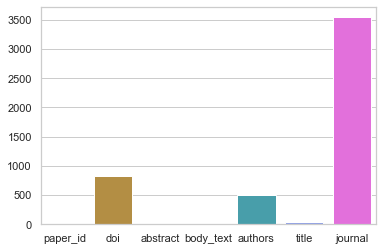

In [0]:
sns.set(style="whitegrid")
sns.barplot(columns_na_count.index, columns_na_count.values, palette=sns.color_palette("husl", 7))

#### Fill Journal with "Not Provided."

In [0]:
X['journal'] = X['journal'].fillna(value="Not Provided.")

In [0]:
columns_na_count = X.isna().sum()

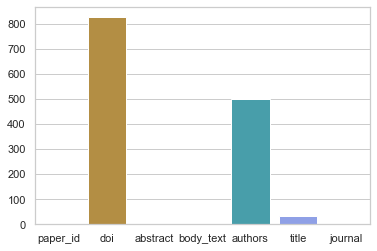

In [0]:
sns.set(style="whitegrid")
sns.barplot(columns_na_count.index, columns_na_count.values, palette=sns.color_palette("husl", 7))

### Drop papers with empty doi, authors and title

In [0]:
X.dropna(inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27493 entries, 0 to 28811
Data columns (total 7 columns):
paper_id     27493 non-null object
doi          27493 non-null object
abstract     27493 non-null object
body_text    27493 non-null object
authors      27493 non-null object
title        27493 non-null object
journal      27493 non-null object
dtypes: object(7)
memory usage: 1.7+ MB


### Detect Papers' Language

In [0]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

DetectorFactory.seed = 0

languages = []

for ii in tqdm(range(0,len(X))):
    text = X.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))

    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        except Exception as e:
            try:
                lang = detect(X.iloc[ii]['abstract'])
            except Exception as e:
                lang = "unknown"
                pass
    
    languages.append(lang)

100%|██████████| 27493/27493 [02:24<00:00, 190.30it/s]


### Language Frequency Distribution Chart

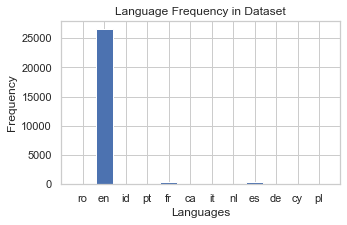

In [0]:
language_freq = dict()

for lang in set(languages):
    language_freq[lang] = languages.count(lang)

plt.figure(figsize=(5,3))    
plt.bar(range(len(language_freq)), list(language_freq.values()), align='center')
plt.xticks(range(len(language_freq)), list(language_freq.keys()))
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.title("Language Frequency in Dataset")
plt.show()

### Majority of text is in English Language
> ### **`Drop all other text`**

In [0]:
X['language'] = languages
X = X[X['language'] == 'en']
X.head()

,paper_id,doi,abstract,body_text,authors,title,journal,language
0,86d4262de73cf81b5ea6aafb91630853248bff5f,10.1016/j.bbamcr.2011.06.011,The endoplasmic reticulum (ER) is the biggest ...,The endoplasmic reticulum (ER) is a multi-func...,"Lynes, Emily M.. Simmen, Thomas",Urban planning of the endoplasmic reticulum (E...,Biochimica et Biophysica Acta (BBA) - Molecula...,en
1,9ec0b1175992879d5b8d3351ef40a28bb48f18ce,10.1016/j.jhin.2019.07.001,,"Sir, Testing for respiratory virus infections ...","Gohil, S.. Donaghy, B.. Tature, D.. Kowal, ...",Seasonal respiratory virus testing in manageme...,Journal of Hospital Infection,en
2,4ed70c27f14b7f9e6219fe605eae2b21a229f23c,10.1080/14787210.2017.1271712,,The Middle East respiratory syndrome coronavir...,"Al-Tawfiq, Jaffar A.. Memish, Ziad A.",Update on therapeutic options for Middle East ...,Expert Rev Anti Infect Ther,en
3,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,10.1016/b978-0-12-800049-6.00293-6,,The evolutionary history of humans is characte...,"Scarpino, S.V.",Evolutionary Medicine IV. Evolution and Emerge...,Encyclopedia of Evolutionary Biology,en
4,6599ebbef3d868afac9daa4f80fa075675cf03bc,10.1016/j.enpol.2008.08.029,"International aviation is growing rapidly, res...","Sixty years ago, civil aviation was an infant ...","Macintosh, Andrew. Wallace, Lailey",International aviation emissions to 2025: Can ...,Energy Policy,en


### Drop papers with empty abstract

In [0]:
X = X[X['abstract'] != '']

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17792 entries, 0 to 28810
Data columns (total 8 columns):
paper_id     17792 non-null object
doi          17792 non-null object
abstract     17792 non-null object
body_text    17792 non-null object
authors      17792 non-null object
title        17792 non-null object
journal      17792 non-null object
language     17792 non-null object
dtypes: object(8)
memory usage: 1.2+ MB


### Import sciSpacy

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg
import string

### Define Stopwords

In [0]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for word in custom_stop_words:
    if word not in stopwords:
        stopwords.append(word)

### Define Text Tokenizer

> ### **`Remove Stopwords, Pronouns, Numbers`**

In [0]:
sci_parser = en_core_sci_lg.load(disable=["tagger", "ner"])
sci_parser.max_length = 5000000

def spacy_tokenizer(text):
    tokens = sci_parser(text)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens \
               if word not in stopwords \
               and word not in punctuations \
               and word.isnumeric() == False ]
    tokens = " ".join([i for i in tokens])
    return tokens

### Pick Sample (10,000) documents

In [0]:
df = X.sample(10000, random_state=235)

### Clean Abstract Text

In [0]:
tqdm.pandas()
df["processed_abstract"] = df["abstract"].progress_apply(spacy_tokenizer)

100%|██████████| 10000/10000 [02:30<00:00, 66.64it/s]


### Clean Body Text

In [0]:
tqdm.pandas()
df["processed_body_text"] = df["body_text"].progress_apply(spacy_tokenizer)

100%|██████████| 10000/10000 [41:01<00:00,  4.06it/s] 


### Save Processed Dataframe

In [0]:
df.to_csv('/Users/rohitchugh/Projects/CS235/DF_text_processed_V2.csv')